# Assignment 4 (15 points)

Please, answer the question by entering runable python code into the cells. Add comments at the beginning of each cell which list the packages that need to be installed (e.g., pip install collections). Run the code so that the output is visible in the notbook before you submit. 

Use python 3.
Submit the notebook (as .ipynb and .pdf) via email to clwagner@uni-koblenz.de (cc to wayne@uni-koblenz.de) until 5.7.2017 (midnight CET). 
Subject of email: "CSS2017 Ass4"
Filename: firstname_lastname_ass4.ipynb




### Simple Contagion: SIR Model (5 points)

Create 3 different network topologies (checkout different network generators [1]) and spread a disease in these networks using the SIR model (which you have to implement yourself; dont use packages like nepidemix). Compare your results with the results from spreading the disease in a fully connected ndtwork.
How do the different network topolgies impact the results?

At the beginning all nodes are susceptible and one randomly picked node is infected.
Choose different infection probabilities and death probabilities.
Plot the proportion of nodes in each state after k steps. 


[1] https://networkx.github.io/documentation/development/reference/generators.html



In [11]:
class GraphState:
    def __init__(self):       
        self.infected = 1
        self.susceptible = 0
        self.recovered = 0   

In [558]:
# %pylab inline 

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

import networkx as NX
import random as RD

import numpy as np
from numpy.random import choice

import time
from collections import defaultdict
import copy


def init_fully_connected_network(n): 
    global g
    g = NX.random_regular_graph(n-1, n) 
    init_network_state()
    
def init_small_world(n, k, p): 
    global g
    g = NX.watts_strogatz_graph(n, k, p) 
    init_network_state()
       
def init_random_network(n, p): 
    global g 
    # n Num of nodes, p  Probability for edge creation.
    g = NX.erdos_renyi_graph(n, p)
    init_network_state()

def init_network_state():
    global g
    # Set up default values for attributes
    for nd in g.nodes_iter():
        g.node[nd]['state'] = "susceptible"

    # select one node randomly and infect it    
    random_node_id = RD.choice(g.nodes())
    g.node[random_node_id]["state"] = "infected"
    g.node[random_node_id]["days"] = beta
  
    


def draw():
    #PL.cla()
    global g, positions
    colors = defaultdict(int)
    for nd in g.nodes():
        if g.node[nd]["state"] == "infected":
            colors[nd] = "red"
        elif g.node[nd]["state"] == "recovered":
            colors[nd] = "green"
        else:                       # Susceptible
            colors[nd] = "blue"
            
    plt.figure()
    NX.draw_networkx(g, pos=None, arrows=False, with_labels=False, node_color=list(colors.values()), node_size=20, width=0.6)
    plt.show()

    
def stepSIR(gs):
    global g
    for node in g.nodes():
        if g.node[node]["state"] == "infected":
            for nod in g.neighbors(node):
                if g.node[nod]['state'] == "susceptible" and infect():
                    g.node[nod]['state'] = "infected"
                    gs.infected+=1
                    gs.susceptible-=1
            if recover():
                g.node[node]["state"] = "recovered"
                gs.infected-=1
                gs.recovered+=1
                        
def runSIR(iterations):
    global g
    gs = GraphState()
    gs.infected = 1
    gs.susceptible = len(g.nodes())
    gs.recovered = 0
    num_iter = 0
    infected_ = []
    susceptible_ = []
    recovered_ = []
#     while(infected>0 and susceptible>0 and recovered<len(g.nodes())):
    while(num_iter<iterations):
        stepSIR(gs)
        infected_.append(gs.infected)
        susceptible_.append(gs.susceptible)
        recovered_.append(gs.recovered)
#         draw()
#         time.sleep(1)
        num_iter+=1
#     print(infected)
#     print(susceptible)
#     print(recovered)
#     print(num_iter)
    return infected_, susceptible_, recovered_

In [567]:
def infect():
    draw = choice([0, 1], 1, p=[1-alpha, alpha])
    return draw[0]
def recover():
    draw = choice([0,1], 1, p=[1-beta, beta])
    return draw[0]

In [580]:
infect()

0

In [568]:
def make_plot(infected_, susceptible_, recovered_=False):
    plt.plot(infected_, 'r', label="Infected")
    plt.plot(susceptible_, 'b', label="Susceptible")
    if recovered_:
        plt.plot(recovered_, 'g', label="Recovered")
    plt.legend()
    plt.show()

In [571]:
alpha = 0.03
beta = 0.1
num_nodes = 500
num_iters = 200

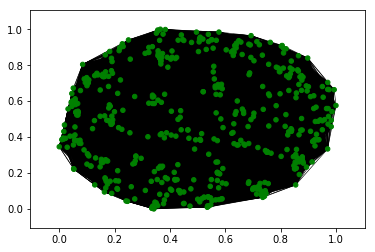

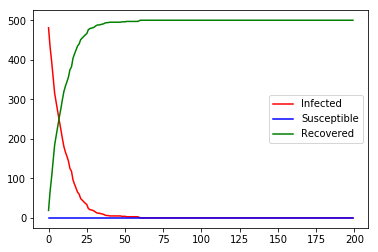

In [572]:
init_fully_connected_network(num_nodes)
infected_, susceptible_, recovered_ = runSIR(num_iters)
draw()
make_plot(infected_, susceptible_, recovered_)

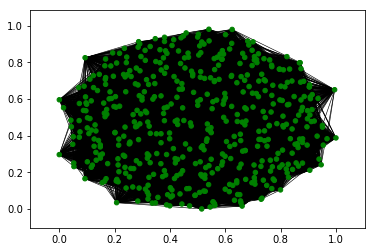

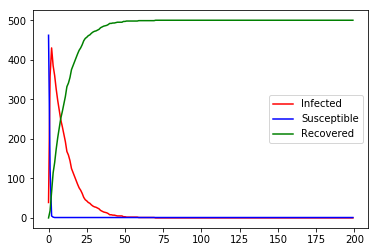

In [573]:
init_random_network(num_nodes, 0.25)
infected_, susceptible_, recovered_ = runSIR(num_iters)
draw()
make_plot(infected_, susceptible_, recovered_)

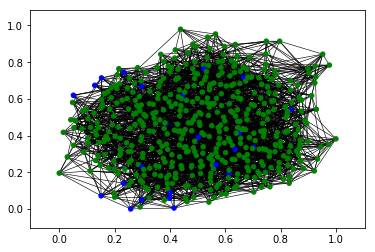

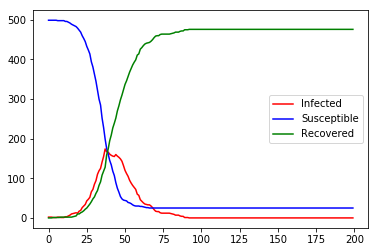

In [574]:
init_small_world(num_nodes, 12, 0.3) # 3 and 0.3
infected_, susceptible_, recovered_ = runSIR(num_iters)
draw()
make_plot(infected_, susceptible_, recovered_)


### Complex Contagion: Granovetter's Linear Treshold Model (5 points)


Implement Granovetter's Linear Treshold Model. Assume that the thresholds of people are normally distributed. Use you code to explore complex contagion in different network topologies (look at network generators [1]). 
Create at least 3 different network topologies. 
Interpret and discuss your results.


[1] https://networkx.github.io/documentation/development/reference/generators.html


In [575]:
def init_network_state():
    global g
    # Set up default values for attributes
    for nd in g.nodes_iter():
        g.node[nd]['state'] = "susceptible"
        g.node[nd]['threshold'] = np.random.normal(0.45, 0.2)
        if RD.random() < 0.2: #initial run
            g.node[nd]['state'] = "infected"

def draw():
    global g, positions
    colors = defaultdict(int)
    for nd in g.nodes():
        if g.node[nd]["state"] == "susceptible":
            colors[nd] = "blue"
        elif g.node[nd]["state"] == "infected":
            colors[nd] = "red"
        else:                       # ?
            colors[nd] = "green"
            
    plt.figure()
    NX.draw_networkx(g, pos=None, arrows=False, with_labels=False, node_color=list(colors.values()), node_size=20, width=0.6)
    plt.show()

def stepGLTM(gs):
    global g
#     random_node_id = RD.choice(g.nodes())
    for node in g.nodes():
        if g.node[node]['state'] == "infected":
            continue
        neigh = g.neighbors(node)
        inf_nei = 0
        for nei in neigh:
            if g.node[nei]['state'] == "infected":
                inf_nei+=1
#         print("infected in nei: " + str(inf_nei/len(neigh)))
#         print("neigh " + str(len(neigh)))
#         print(g.node[node]['threshold'])
        if inf_nei/len(neigh) > g.node[node]['threshold']:
            g.node[node]["state"] = "infected"
            gs.infected += 1
            gs.susceptible -= 1
def runGLTM(iterations):
    global g
    gs = GraphState()
    gs.infected = len([n for n in g if g.node[n]['state']=="infected"])
    gs.susceptible = len(g.nodes()) - gs.infected
    num_iter = 0
    infected_ = []
    susceptible_ = []
    while(num_iter<iterations):
        stepGLTM(gs)
        infected_.append(gs.infected)
        susceptible_.append(gs.susceptible)
        num_iter+=1
#         print(len([n for n in g if g.node[n]['state']=="infected"]))
    return infected_, susceptible_    

In [576]:
num_nodes = 1000
num_iters = 100

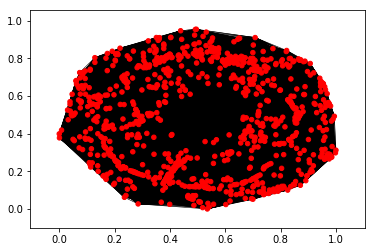

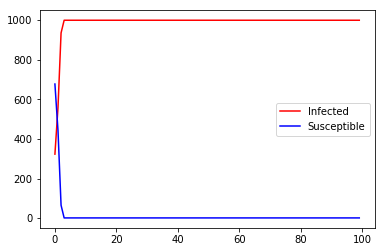

In [577]:
init_fully_connected_network(num_nodes)
infected_, susceptible_ = runGLTM(num_iters)
draw()
make_plot(infected_, susceptible_)

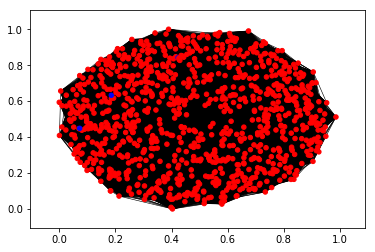

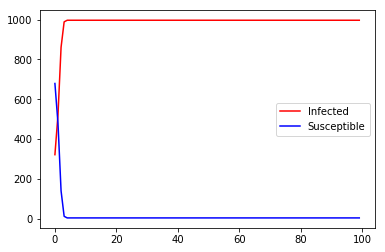

In [578]:
init_random_network(num_nodes, 0.25)
infected_, susceptible_ = runGLTM(num_iters)
draw()
make_plot(infected_, susceptible_)

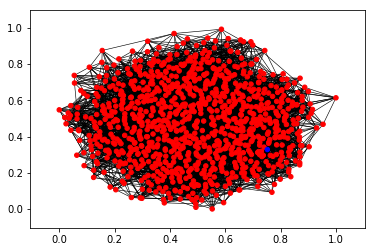

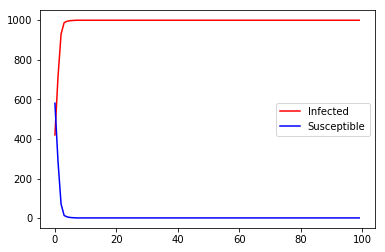

In [579]:
init_small_world(num_nodes, 12, 0.3) # 3 and 0.3
infected_, susceptible_ = runGLTM(num_iters)
draw()
make_plot(infected_, susceptible_)

### Axelrod Model (5 points)

Implement Axelrods  model of cultural diffusion.
Create a network and randomly assign a cultural vector to each node.
Implement the dynamic process as describe in: http://www-personal.umich.edu/~axe/research/Dissemination.pdf
Try different number of features and traits per feature.
Make a plot that describes the macro-state of the system (e.g., depict the number of groups that share a culture. At the beginning each node has it's own culture')?


In [583]:
g = NX.Graph()
features = [1,2,3,4,5]
traits = [1,2,3,4,5]
